In [21]:
import pandas as pd

slope_comparison = pd.read_csv('data/recorded_vs_measured_slope_comparison.csv')

slope_comparison

Av_ID                            River        From  L_A [km]  \
0            DANUBE                           Danube      global     95.00   
1      HUANGHE_1930                          Huanghe      global     51.60   
2         MAGDALENA                        Magdalena      global     67.00   
3    MISS_LAFOURCHE    Mississippi, Lafourche-Modern      global    100.00   
4       MISS_MODERN  Mississippi, Modern-Atchafalaya      global    490.00   
5              NILE                             Nile      global    210.00   
6           ORINOCO                          Orinoco      global     78.00   
7            PARANA                          Paran√°      global    210.00   
8             RHINE                      Rhine-Meuse      global     51.00   
9   FIHERENANA_2001                       Fiherenana  madagascar      5.24   
10   MANAMBOLO_2004                        Manambolo  madagascar     22.65   
11          MANGOKY                          Mangoky  madagascar     55.75   
12   MORONDAVA_1979                        Morondava  madagascar     38.21   
13      SAMBAO_2004                           Sambao  madagascar     30.45   

    L_A_error [km]     S [-]  L_A [km].1  Upstream S [-]  Upstream S_IQR [-]  \
0              0.0  0.000050     125.242        0.000031            0.000005   
1             17.3  0.000064      85.853        0.000102            0.000009   
2              0.0  0.000095      85.906        0.000077            0.000009   
3             25.0  0.000043     171.165        0.000052            0.000005   
4              0.0  0.000043     243.223        0.000081            0.000020   
5              0.0  0.000064     237.385        0.000119            0.000015   
6              0.0  0.000060      54.974        0.000062            0.000059   
7              0.0  0.000040     104.905        0.000026            0.000004   
8              0.0  0.000110      73.881        0.000086            0.000005   
9              0.0  0.002231       4.603        0.002433            0.000187   
10             0.0  0.000599      19.738        0.000655            0.000010   
11             0.0  0.000769      54.002        0.000891            0.000013   
12             0.0  0.001390      32.024        0.001213            0.000015   
13             0.0  0.000565      26.542        0.000446            0.000027   

    Downstream S [-]  Downstream S_IQR [-]  Immediate Upstream S [-]  \
0           0.000006              0.000002                  0.000031   
1           0.000074              0.000014                  0.000089   
2           0.000038              0.000013                  0.000011   
3           0.000019              0.000010                  0.000052   
4           0.000025              0.000026                  0.000006   
5           0.000074              0.000040                  0.000082   
6           0.000003              0.000003                  0.000005   
7           0.000002              0.000004                  0.000007   
8           0.000076              0.000013                  0.000076   
9           0.002174              0.000036                  0.002174   
10          0.000323              0.000000                  0.000584   
11          0.000468              0.000118                  0.000792   
12          0.001073              0.000000                  0.001133   
13          0.000286              0.000054                  0.000305   

    Immediate Upstream S_IQR [-]  Total Rise Over Run  
0                   4.540000e-06             0.000052  
1                   7.270000e-06             0.000118  
2                   8.250000e-06             0.000059  
3                   4.610000e-06             0.000059  
4                   3.480000e-05             0.000069  
5                   1.300000e-05             0.000083  
6                   0.000000e+00             0.000072  
7                   3.630000e-06             0.000038  
8                   6.230000e-19             0.000134  
9

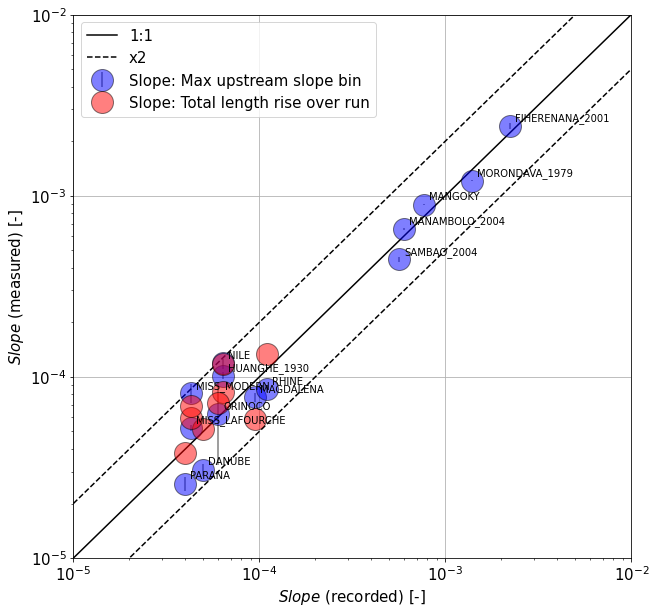

In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import numpy as np

mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xscale("log", nonpositive='clip')
ax.set_yscale("log", nonpositive='clip')

refplot = np.linspace(0.00001,0.01,2)
refplot_upper = refplot*2
refplot_lower = refplot/2

ax.plot(refplot,refplot, color='k', label='1:1')
ax.plot(refplot,refplot_upper, color='k', linestyle='dashed', label='x2')
ax.plot(refplot, refplot_lower, color='k', linestyle='dashed') 

annotate_text = []

maxupstr = ax.errorbar(slope_comparison['S [-]'].values, slope_comparison['Upstream S [-]'].values, yerr=slope_comparison['Upstream S_IQR [-]'].values/2,
            fmt='o', ms=22, markerfacecolor='blue', ecolor='black', markeredgecolor='black', alpha=0.5, label="Slope: Max upstream slope bin")

slope_comparison_no_mad = slope_comparison.loc[slope_comparison['From']=='global']

roverr = ax.errorbar(slope_comparison_no_mad['S [-]'].values, slope_comparison_no_mad['Total Rise Over Run'].values,
            fmt='o', ms=22, markerfacecolor='red', ecolor='black', markeredgecolor='black', alpha=0.5, label='Slope: Total length rise over run')


for idx, row in slope_comparison.iterrows():
    ax.annotate(row.Av_ID, xy=(row['S [-]'], row['Upstream S [-]']), 
                xytext=(5, 5), xycoords='data', textcoords='offset points',
               fontsize=10)
    
plt.grid('on')
ax.set_xlabel('$Slope$ (recorded) [-]')
ax.set_ylabel('$Slope$ (measured) [-]')
ax.set_ylim(bottom=0.00001, top=0.01)
ax.set_xlim(left=0.00001, right=0.01)
ax.legend()
